<a href="https://colab.research.google.com/github/mylenagsd/PDS/blob/main/TP02_pds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import soundfile as sf
from IPython.display import Audio

In [18]:
# Q1 ---- Creating a Scale 

sr = 44100
t = np.linspace(0, 8, sr)
def escala(t):
  # Frequencies of each note in the scale
  fc = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]

  # Duration of a second for each note
  nT = np.linspace(0, 1, sr)
  ans = [np.zeros(nT.shape), np.zeros(nT.shape), np.zeros(nT.shape), np.zeros(nT.shape), np.zeros(nT.shape), np.zeros(nT.shape), np.zeros(nT.shape), np.zeros(nT.shape)]
  
  n = 4 # Number of harmonics 
  B = 0.0035
  h = np.linspace(0, n, n)
  fn = h * np.sqrt(1 + B * h**2)

  for x in range(len(fc)):
    for i, k in enumerate(fn):
      aux = 2 * np.pi * (fc[x] + (fc[x] * k))
      ans[x] += (1/(i+1)**2) * np.sin(aux * nT)

  data = np.append([ans[0], ans[1], ans[2], ans[3]],[ans[4], ans[5], ans[6], ans[7]])
  return data

sig = escala(t)

Audio(sig, rate=sr)

In [19]:
# Q2

Audio(sig, rate=sr/2)

Modifying the sample rate, affects both the duration and the frequency of the audio signal. Reducing in half, the signal reading now takes twice as long to read an entire cycle/period, making the signal duration twice the original duration and the frequency of the new signal also halves, in a way "expanding"the signal over time and making it sound lower.

In [20]:
# Q3

sr = 44100
t = np.linspace(0, 8, sr)

def acorde(t):
  # Frequencies of C, E and G 
  fc = [261.63, 329.63, 392.00] 
  
  duration = 8 
  nT = np.linspace(0, duration, duration*sr)
  ans = [np.zeros(nT.shape), np.zeros(nT.shape), np.zeros(nT.shape)]

  n = 4 # Number of harmonics
  B = 0.0035
  h = np.linspace(0, n, n)
  fn = h * np.sqrt(1 + B * h**2)

  for x in range(len(fc)):
    for i, k in enumerate(fn):
      aux = 2 * np.pi * (fc[x] + (fc[x] * k))
      ans[x] += (1/(i+1)**2) * np.sin(aux * nT)

  data = np.sum([ans[0], ans[1], ans[2]], axis = 0)
  return data

sig = acorde(t)

Audio(sig, rate=sr)

In [21]:
# Q5

# 'escala' function - left channel
t_left  = (t/4 - np.fix(t/4))
left   = escala(t_left)

# 'acorde' funtion - right channel
t_right = ((t+2)/4 - np.fix((t+2)/4))
right  = acorde(t_right)

sig = np.array([left, right])

# Saving in a file
sf.write('/content/escala_acorde.wav', sig.T, sr)

Audio(sig, rate=sr)

In [22]:
# Q6

def envelope_exp(sig, nS=1, nA=0.05, nD=0.05, nR=0.3, sr=sr):
  if nS < (nA + nD):
    return False
  
  t_max = nS + nR
  amp_max = 1
  amp_s = 0.4
  amp_sf = 0.2 

  A = int(np.fix(nA * sr))
  D = int(np.fix(nD * sr))
  S = int(np.fix(nS * sr))
  R = int(np.fix(nR * sr))

  ans = np.zeros( S + R )
  S = S - (A+D)

  # Duration os exponentials
  t1 = np.linspace(0, D, D)
  t2 = np.linspace(0, S, S)
  t3 = np.linspace(0, R, R)

  ans[0:A] = np.linspace(0, amp_max, A)
  ans[A:A+D] = amp_max*np.exp(-t1/(1.1*D))
  ans[A+D:A+D+S] = amp_s*np.exp(-t2/(1.5*S))
  ans[A+D+S:A+D+S+R] = amp_sf*np.exp(-3*t3/R)

  return np.append(sig, sig[0:R]) * ans

In [23]:
# Base used to evaluate 'envelope_exp' funtion
def base3(duration=1, sr=sr, fc=261.65, n=4):
  nT = np.linspace(0, duration, duration*sr)
  ans = np.zeros(nT.shape)

  B = 0.0035
  h = np.linspace(0, n, n)
  fn = h * np.sqrt(1 + B * h**2)

  for i, k in enumerate(fn):
    aux = 2 * np.pi * (fc + (fc * k))
    ans += (1/(i+1)**2) * np.sin(aux * nT)

  return envelope_exp(ans, nS=duration)

In [24]:
# Resulting signal of 'base3' with 'envelope_exp'
sig = base3(fc=261.65, duration=1, n=4)

Audio([sig, sig], rate=sr)

In [25]:
yf = abs(np.fft.fft(sig))
xf  = np.linspace(0.0, 1.0/(2.0*10), int(t.size/2))

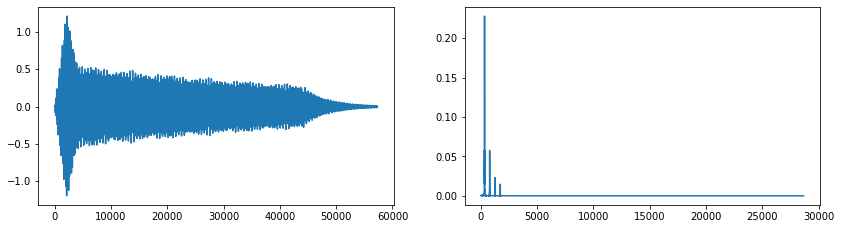

In [26]:
plt.figure(figsize = (14, 8))
plt.subplot(221)
plt.plot(sig)
plt.subplot(222)
plt.plot(2/yf.size * yf[:yf.size//2])